In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import theano
from PIL import Image
from numpy import *

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam
from keras.utils import np_utils

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

Using TensorFlow backend.
/Users/zes3/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# input image dimensions
img_rows, img_cols = 200, 200

# number of channels
img_channels = 1

#  data
path1 = '/Users/zes3/Documents/BaumbilderBA'    #path of folder of images    
path2 = '/Users/zes3/Documents/Bachelor_Thesis/BaumbilderBA_resized'  #path of folder to save images    

listing = os.listdir(path1)
num_folders=size(listing)
for folder in listing:
    if folder == '.DS_Store':
        continue
    for root, dirs, files in os.walk(path1 + '/' + folder):
        herkunftsort = os.path.basename(os.path.dirname(root))
        print(herkunftsort)
        if root == '.DS_Store':
            continue
        for file in files:
            #print(file)
            if file == '.DS_Store':
                continue
            path = os.path.join(root,file)
            im = Image.open(path)   
            img = im.resize((img_rows,img_cols))
            gray = img.convert('L')
            #need to do some more processing here
            gray.save(path2 +'/' +  herkunftsort + '_' + file, "JPEG")


BaumbilderBA
Biel_Vorstadt
BaumbilderBA
Isenfluh
Isenfluh
Isenfluh
Isenfluh
Isenfluh
BaumbilderBA
Biel
Biel
Biel
Biel
Biel
Biel
Biel
BaumbilderBA
Alle_alten_Bern
Alle_alten_Bern
Alle_alten_Bern
Alle_alten_Bern
Alle_alten_Bern
Alle_alten_Bern
Alle_alten_Bern
Alle_alten_Bern
Alle_alten_Bern
Alle_alten_Bern
BaumbilderBA
Schosshalden
Schosshalden
Schosshalden
Schosshalden
BaumbilderBA
Sumiswald
Sumiswald
Sumiswald
Sumiswald
Sumiswald
Sumiswald
Sumiswald
Sumiswald
Sumiswald
Sumiswald
BaumbilderBA
Allmend_Schosshalden
Allmend_Schosshalden
Allmend_Schosshalden
Allmend_Schosshalden
Allmend_Schosshalden
Allmend_Schosshalden
Allmend_Schosshalden
Allmend_Schosshalden
Allmend_Schosshalden
Allmend_Schosshalden
Allmend_Schosshalden
Allmend_Schosshalden
BaumbilderBA
Wyssenau_Isenfluh
Wyssenau_Isenfluh
Wyssenau_Isenfluh
Wyssenau_Isenfluh
Wyssenau_Isenfluh
Wyssenau_Isenfluh
Wyssenau_Isenfluh
Wyssenau_Isenfluh
Wyssenau_Isenfluh
Wyssenau_Isenfluh
BaumbilderBA
Paul_Klee
Paul_Klee
Paul_Klee
BaumbilderBA
Wa

NameError: name 'num_samples' is not defined

(7686, 40000)


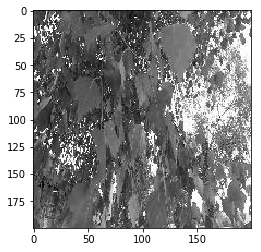

(7686, 40000)
(7686,)


In [4]:
imlist = os.listdir(path2)
if '.DS_Store' in imlist:
    imlist.remove('.DS_Store')
im1 = array(Image.open('BaumbilderBA_resized/'+ imlist[0])) # open one image to get size
m,n = im1.shape[0:2] # get the size of the images
imnbr = len(imlist) # get the number of images

# create matrix to store all flattened images
immatrix = array([array(Image.open('BaumbilderBA_resized'+ '/' + im2)).flatten()
              for im2 in imlist],'f')
print(immatrix.shape)
                
# -1 ist da, weil wir das .DS_STORE abziehen
label=np.ones((imnbr,),dtype = int)
i=0
while i < len(imlist):
    fileName = imlist[i]
    #print(str(i) + "->" + fileName)
    if "Bergahorn" in fileName:
        label[i] = 0
        #print("Bergahorn")
    if "Spitzahorn" in fileName:
        label[i] = 1
        #print("Spitzahorn")
    if "Feldahorn" in fileName:
        label[i] = 2
        #print("Feldahorn")
    if "Buche" in fileName:
        label[i] = 3
        #print("Buche")
    if "Birke" in fileName:
        label[i] = 4
        #print("Birke")
    if "Eiche" in fileName:
        label[i] = 5
        #print("Eiche")
    if "Stechpalme" in fileName:
        label[i] = 6
        #print("Stechpalme")
    if "Ulme" in fileName:
        label[i] = 7
        #print("Ulme")
    if "Linde" in fileName:
        label[i] = 8
        #print("Linde")
    if "Kirsche" in fileName:
        label[i] = 9
        #print("Kirsche")
    if "Esche" in fileName:
        label[i] = 10
        #print("Esche")
    i += 1
#while i < len(imlist):
#    print(str(i) + "->" + imlist[i])
#label[0:89]=0
#label[89:187]=1
#label[187:]=2


data,Label = shuffle(immatrix,label, random_state=2)
train_data = [data,Label]

img=immatrix[167].reshape(img_rows,img_cols)

plt.imshow(img)
plt.imshow(img,cmap='gray')
plt.show()
print (train_data[0].shape)
print (train_data[1].shape)

In [68]:
#im1 = array(Image.open('BaumbilderBA_resized/'+ imlist[0]))
#m,n = im1.shape[0:2] # get the size of the images
#imnbr = len(imlist) # get the number of images

# create matrix to store all flattened images
#immatrix = array([array(Image.open('BaumbilderBA_resized'+ '/' + im2)).flatten()
              for im2 in imlist],'f')
# -1 ist da, weil wir das .DS_STORE abziehen
#label=np.ones((imnbr-1,),dtype = int)

7496
7495


X_train shape: (780, 1, 200, 200)
780 train samples
196 test samples


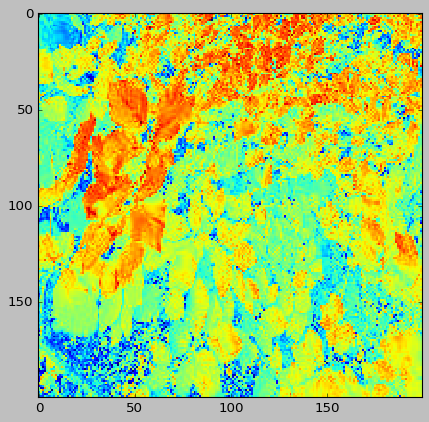

label :  [1. 0. 0.]


In [12]:
#batch_size to train
batch_size = 32
# number of output classes
nb_classes = 3
# number of epochs to train
nb_epoch = 20


# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3

#%%
(X, y) = (train_data[0],train_data[1])


# STEP 1: split X and y into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)


X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

i = 100
plt.imshow(X_train[i, 0], interpolation='nearest')
plt.show()
print("label : ", Y_train[i,:])

In [ ]:
model = Sequential()

model.add(Convolution2D(nb_filters, nb_conv, nb_conv,
                        border_mode='valid',
                        input_shape=(1, img_rows, img_cols)))
convout1 = Activation('relu')
model.add(convout1)
model.add(Convolution2D(nb_filters, nb_conv, nb_conv))
convout2 = Activation('relu')
model.add(convout2)
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

# siehe https://stackoverflow.com/questions/42689066/convolutional-neural-net-keras-val-acc-keyerror-acc?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=["accuracy"])


hist = model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,
              show_accuracy=True, verbose=1, validation_data=(X_test, Y_test))
            
            
hist = model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,
              show_accuracy=True, verbose=1, validation_split=0.2)


# visualizing losses and accuracy

train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(nb_epoch)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
print(plt.style.available) # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])
plt.show()


# result       
score = model.evaluate(X_test, Y_test, show_accuracy=True, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
print(model.predict_classes(X_test[1:5]))
print(Y_test[1:5])

(1, 1, 200, 200)


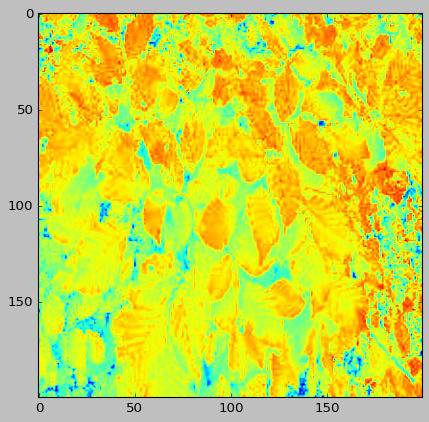

(1, 32, 198, 198)
(1, 198, 198, 32)


<module 'matplotlib.pyplot' from '/Users/zes3/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

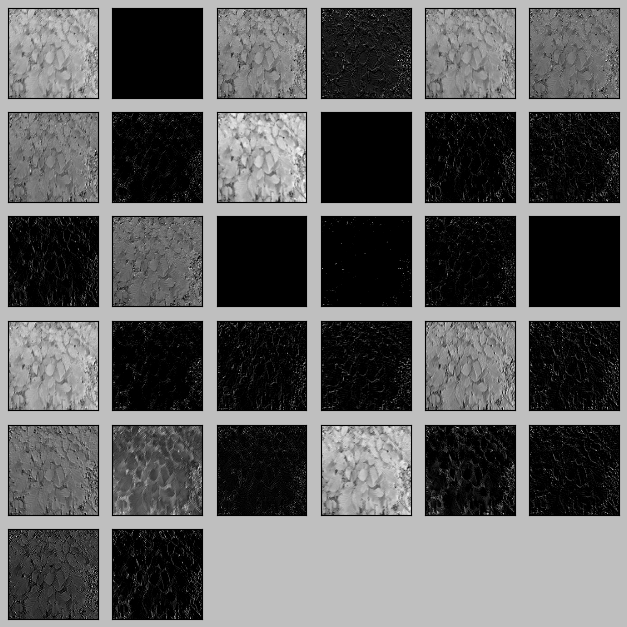

In [19]:
# visualizing intermediate layers

# siehe https://github.com/keras-team/keras/issues/2886
output_layer = model.layers[1].output
output_fn = theano.function([model.layers[0].input], output_layer)

# the input image

input_image=X_train[0:1,:,:,:]
print(input_image.shape)

plt.imshow(input_image[0,0,:,:],cmap ='gray')
plt.imshow(input_image[0,0,:,:])
plt.show()


output_image = output_fn(input_image)
print(output_image.shape)

# Rearrange dimension so we can plot the result 
output_image = np.rollaxis(np.rollaxis(output_image, 3, 1), 3, 1)
print(output_image.shape)


fig=plt.figure(figsize=(8,8))
for i in range(32):
    ax = fig.add_subplot(6, 6, i+1)
    #ax.imshow(output_image[0,:,:,i],interpolation='nearest' ) #to see the first filter
    ax.imshow(output_image[0,:,:,i],cmap=matplotlib.cm.gray)
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    plt.tight_layout()
plt

In [20]:
# Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix

Y_pred = model.predict(X_test)
#print(Y_pred)
y_pred = np.argmax(Y_pred, axis=1)
#print(y_pred)

y_pred = model.predict_classes(X_test)
print(y_pred)

p=model.predict_proba(X_test) # to predict probability

target_names = ['class 0(Buche)', 'class 1(Ulme)', 'class 2(Eiche)']
print(classification_report(np.argmax(Y_test,axis=1), y_pred,target_names=target_names))
print("Confusion matrix:")
print(confusion_matrix(np.argmax(Y_test,axis=1), y_pred))

# saving weights
fname = "weights-Test-CNN.hdf5"
model.save_weights(fname,overwrite=True)

# Loading weights
fname = "weights-Test-CNN.hdf5"
model.load_weights(fname)

196/196 [==============================] - 8s     
[1 1 0 0 1 1 1 1 2 2 1 0 0 2 1 0 1 0 0 1 1 0 1 1 2 0 1 0 0 1 2 0 1 0 2 0 2
 0 2 1 2 1 1 0 2 0 1 0 0 0 2 2 0 0 1 0 0 2 2 0 2 0 2 2 2 0 2 0 0 2 0 0 1 0
 1 0 0 0 0 0 2 2 1 2 2 1 0 2 2 2 0 1 0 2 2 1 0 0 1 0 2 1 0 0 0 0 1 2 2 0 2
 0 2 2 2 0 1 1 0 2 2 2 1 0 0 0 0 2 2 1 1 0 2 2 0 0 0 0 0 0 0 1 1 2 0 0 1 0
 0 0 0 0 1 0 0 2 0 0 0 0 2 0 0 1 1 2 0 1 0 0 1 1 0 2 0 2 2 1 0 1 0 2 2 2 2
 2 2 0 2 1 0 2 2 0 0 0]
196/196 [==============================] - 9s     
                precision    recall  f1-score   support

class 0(Buche)       0.90      0.96      0.93        84
 class 1(Ulme)       0.91      0.83      0.87        52
class 2(Eiche)       0.98      0.97      0.97        60

   avg / total       0.93      0.93      0.93       196

Confusion matrix:
[[81  3  0]
 [ 8 43  1]
 [ 1  1 58]]


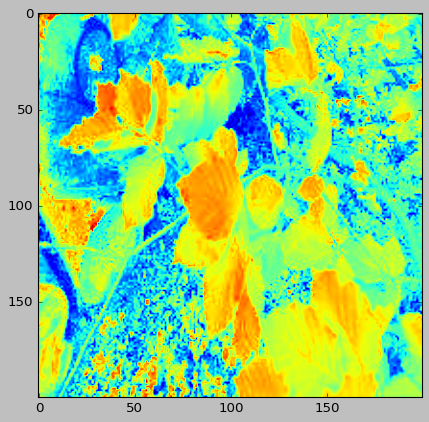

In [4]:
plt.imshow(img)

In [12]:
list = ['test', 'tust']
list.remove('test')
print(list)

['tust']


In [34]:
import numpy as np
import os

path2 = '/Users/zes3/Documents/FS2018/Projekt2/treeimages_resized'  #path of folder to save images    

print("hey")

imlist = os.listdir(path2)
imlist.remove('.DS_Store')
label=np.ones((len(imlist),),dtype = int)
label[0:89]=0
label[89:187]=1
label[187:]=2
i=0
while i < len(imlist):
    fileName = imlist[i]
    print(str(i) + "->" + fileName)
    if "Buche" in fileName:
        label[i] = 0
        print("Buche")
    if "Ulme" in fileName:
        label[i] = 1
        print("Ulme")
    if "Eiche" in fileName:
        label[i] = 2
        print("Eiche")
    i += 1
print("hou")

hey
0->Buche2_341.png
Buche
1->Buche1_296.png
Buche
2->Buche3_146.png
Buche
3->Buche3_16.png
Buche
4->Eiche1_1.png
Eiche
5->Ulme2_276.png
Ulme
6->Buche1_241.png
Buche
7->Buche3_191.png
Buche
8->Buche2_396.png
Buche
9->Eiche3_901.png
Eiche
10->Ulme1_376.png
Ulme
11->Ulme1_61.png
Ulme
12->Buche7_66.png
Buche
13->Eiche3_256.png
Eiche
14->Buche2_631.png
Buche
15->Eiche3_281.png
Eiche
16->Ulme1_606.png
Ulme
17->Buche2_816.png
Buche
18->Eiche3_1076.png
Eiche
19->Buche2_751.png
Buche
20->Eiche3_86.png
Eiche
21->Buche7_166.png
Buche
22->Buche2_56.png
Buche
23->Eiche5_401.png
Eiche
24->Buche2_786.png
Buche
25->Eiche3_51.png
Eiche
26->Buche2_976.png
Buche
27->Eiche3_646.png
Eiche
28->Ulme3_111.png
Ulme
29->Ulme2_316.png
Ulme
30->Eiche3_691.png
Eiche
31->Buche4_516.png
Buche
32->Buche1_321.png
Buche
33->Eiche5_171.png
Eiche
34->Ulme1_216.png
Ulme
35->Eiche3_861.png
Eiche
36->Ulme1_571.png
Ulme
37->Ulme3_71.png
Ulme
38->Buche1_446.png
Buche
39->Eiche5_616.png
Eiche
40->Buche2_591.png
Buche
41->Eic

Eiche
917->Buche1_271.png
Buche
918->Buche2_601.png
Buche
919->Buche7_56.png
Buche
920->Eiche5_586.png
Eiche
921->Ulme1_636.png
Ulme
922->Buche2_826.png
Buche
923->Buche4_136.png
Buche
924->Buche7_81.png
Buche
925->Buche8_306.png
Buche
926->Buche2_991.png
Buche
927->Buche2_66.png
Buche
928->Eiche3_1046.png
Eiche
929->Buche2_761.png
Buche
930->Buche7_156.png
Buche
931->Eiche3_306.png
Eiche
932->Buche2_946.png
Buche
933->Buche7_181.png
Buche
934->Eiche3_61.png
Eiche
935->Ulme2_326.png
Ulme
936->Eiche3_886.png
Eiche
937->Ulme3_121.png
Ulme
938->Eiche3_676.png
Eiche
939->Eiche5_196.png
Eiche
940->Eiche3_851.png
Eiche
941->Ulme1_226.png
Ulme
942->Buche4_526.png
Buche
943->Buche1_311.png
Buche
944->Eiche5_141.png
Eiche
945->Buche3_6.png
Buche
946->Buche1_476.png
Buche
947->Eiche5_626.png
Eiche
948->Ulme3_41.png
Ulme
949->Ulme1_541.png
Ulme
950->Buche4_296.png
Buche
951->Buche1_36.png
Buche
952->Eiche3_111.png
Eiche
953->Buche2_576.png
Buche
954->Ulme1_596.png
Ulme
955->Ulme3_96.png
Ulme
956-

In [35]:
print(immatrix)

[[123. 147. 162. ... 105.  93. 124.]
 [209.  97. 157. ... 186. 191. 208.]
 [144. 144. 142. ... 191. 190. 171.]
 ...
 [ 61.  41.  40. ...  81. 107.  99.]
 [174. 211. 214. ... 114. 103. 124.]
 [143. 125. 158. ... 155. 128. 114.]]
